In [1]:
import csv
import pandas as pd
import itertools
import math
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
import string
import re
import nltk
from google.colab import files
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import classification_report, plot_confusion_matrix




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
uploaded = files.upload()

news = pd.read_csv('news.csv')

Saving news.csv to news.csv


In [3]:
news.head()

,id,title,score,subreddit,url,num_comments,text,created,police_brutality
0,dfn3yi,Blizzard Employees Staged a Walkout After the ...,226324,news,https://www.thedailybeast.com/blizzard-employe...,9623,NaN,1.570683e+09,0
1,eubjfc,Kobe Bryant killed in helicopter crash in Cali...,213684,news,https://www.fox5dc.com/news/kobe-bryant-killed...,20705,NaN,1.580096e+09,0
2,84aebi,Scientist Stephen Hawking has died aged 76,188175,news,http://news.sky.com/story/scientist-stephen-ha...,6916,NaN,1.521028e+09,0
3,dp5lr1,Jeffrey Epstein's autopsy more consistent with...,186243,news,https://www.foxnews.com/us/forensic-pathologis...,10057,NaN,1.572465e+09,0
4,7ej943,F.C.C. Announces Plan to Repeal Net Neutrality,178001,news,https://www.nytimes.com/2017/11/21/technology/...,10857,NaN,1.511312e+09,0


In [4]:
news=news.drop(['id', 'score','subreddit', 'url','num_comments','text','created'], axis=1)

In [5]:
news.head()

,title,police_brutality
0,Blizzard Employees Staged a Walkout After the ...,0
1,Kobe Bryant killed in helicopter crash in Cali...,0
2,Scientist Stephen Hawking has died aged 76,0
3,Jeffrey Epstein's autopsy more consistent with...,0
4,F.C.C. Announces Plan to Repeal Net Neutrality,0


In [6]:
uploaded = files.upload()
police_use_force = pd.read_csv('police_use_force.csv')

Saving police_use_force.csv to police_use_force.csv


In [7]:
police_use_force['title']=police_use_force['name']

In [8]:
police_use_force=police_use_force.drop(['name'], axis=1)

In [9]:
police_use_force.head()

,police_brutality,title
0,1,Compilation of incidents
1,1,Police shove a protesting woman down a set of ...
2,1,Police throw tear-gas at protesters on a bridge.
3,1,Police assault protesters
4,1,Police shoot non-violent protester in the head


In [10]:
frames = [news, police_use_force]

In [11]:
df=pd.concat(frames)

In [12]:
df.shape

(1988, 2)

In [13]:
df.head()

,title,police_brutality
0,Blizzard Employees Staged a Walkout After the ...,0
1,Kobe Bryant killed in helicopter crash in Cali...,0
2,Scientist Stephen Hawking has died aged 76,0
3,Jeffrey Epstein's autopsy more consistent with...,0
4,F.C.C. Announces Plan to Repeal Net Neutrality,0


In [14]:
df.shape

(1988, 2)

In [15]:
nlp = spacy.load("en")

In [16]:
def tokenize(text):
    text = nlp(text)
    tokens = [token.lemma_ for token in text if (token.is_stop != True) and (token.is_punct != True) and (token.text != " ")]
    return tokens

def retoken(text):   
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    tokens = str(tokens)
    
    return tokens

In [17]:
df['tokens'] = df['title'].apply(tokenize)

In [18]:
df['tokens'] = df['title'].apply(retoken)

In [19]:
df.head()

,title,police_brutality,tokens
0,Blizzard Employees Staged a Walkout After the ...,0,"['blizzard', 'employees', 'staged', 'a', 'walk..."
1,Kobe Bryant killed in helicopter crash in Cali...,0,"['kobe', 'bryant', 'killed', 'in', 'helicopter..."
2,Scientist Stephen Hawking has died aged 76,0,"['scientist', 'stephen', 'hawking', 'has', 'di..."
3,Jeffrey Epstein's autopsy more consistent with...,0,"['jeffrey', 'epsteins', 'autopsy', 'more', 'co..."
4,F.C.C. Announces Plan to Repeal Net Neutrality,0,"['fcc', 'announces', 'plan', 'to', 'repeal', '..."


In [20]:
vect = CountVectorizer()
vect.fit(df['tokens'])
dtm = vect.transform(df['tokens'])

In [21]:
dtm_df = pd.DataFrame(dtm.todense(), columns = vect.get_feature_names())

In [22]:
dtm_df.head()

,10,100,1000,10000,100000,100150,101,104,107,10acre,10bn,10th,10year,10yearold,11,11000,112,117,1191,11943,11th,11yearold,12,1200,120000,127700,12m,12th,12yearold,12yearolds,13,130,1300,13k,13th,14,14000,141,14yearold,15,...,wrongful,wrote,wtop,wuhan,wv,xbox,xi,xl,xxx,yang,yard,yards,yates,year,years,yearslong,yeezy,yelled,yelling,yellow,yells,yellsmerry,yiannopoulos,york,you,youd,young,younger,youporn,your,youre,youtube,zap,zealand,zeroes,zimbabwe,zip,zoo,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
X = df['title']
y = df['police_brutality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1590,)
(398,)
(1590,)
(398,)


In [24]:
#pipeline = Pipeline([
#    ('tfidf', TfidfVectorizer()),
#    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=2, n_estimators=45)),
#])

In [25]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=4, n_estimators=45,)),
])
pipeline.fit(X_train,y_train)
#threshold = 0.51
predictions = pipeline.predict(X_test)
#predicted = (predicted_proba [:,1] >= threshold).astype('int')

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

#param_distributions = {
#    'classifier__max_depth': [1, 2, 3, 4, 5]}
#
#search = RandomizedSearchCV(
#    pipeline, 
#    param_distributions=param_distributions, 
#    n_iter=10, 
#    cv=3, 
#    scoring='accuracy', 
#    verbose=10, 
#    return_train_score=True, 
#    n_jobs=-1
#)
#
#search.fit(X_train, y_train);

In [27]:
#print('Best hyperparameters', search.best_params_)
#print('Best Score', search.best_score_)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       185
           1       0.98      0.83      0.90       213

    accuracy                           0.90       398
   macro avg       0.90      0.90      0.90       398
weighted avg       0.91      0.90      0.90       398



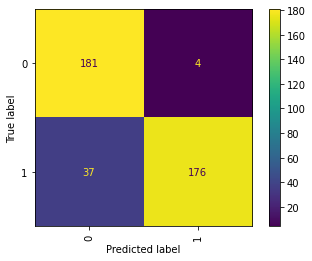

In [29]:
cm = plot_confusion_matrix(pipeline, X_test, y_test, values_format='.0f', xticks_rotation='vertical')
cm;

In [30]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_test)[:, -1]
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))

Test ROC AUC: 0.9737977414033753


In [31]:
from pickle import dump
# save the model
dump(pipeline, open('hrf_model_version_five.pkl', 'wb'))

In [32]:
from pickle import load
# load the model
loaded_model = load(open('hrf_model_version_five.pkl', 'rb'))

In [33]:
def get_predictions(post, num_answers=2):
  """ takes a post and returns the top categories it fits in """

  # get the predicted probabilities for each class
  preds = pd.Series(pipeline.predict_proba(post)[0])

  # save each class to the Series index
  preds.index = pipeline.classes_

  # sort to get the most likely classes
  preds = preds.sort_values(ascending=False)

  # return the top num_answers results in dict format
  return preds[:num_answers].to_dict()

In [34]:
history_post = [ """
                History if my favorite subject.  I love to read historical accounts about ancient Rome and Greece.
                I'm also a big World War 2 buff and I collect objects with historical significance.
                """]

In [35]:
music_post = [ """
                I love to listen to music.  My favorite singer/songwriter is Foy Vance.  Every so often
                I like to listen to Bob Marley.  I have a large vinyl music collection but more recently I've
                been listening to everything on Spotify.
                """]

In [36]:
police_post= ["""Cops shot rubber bullets and peaceful protesters before using tear gas on them
"""]

In [37]:
portland_post= ["""Portland is lovely in the summer
"""]

In [38]:
police_two_post= ["""Man bloodied while being detained by Beaumont Police
"""]

In [39]:
get_predictions(history_post)

{0: 0.544513201997474, 1: 0.455486798002526}

In [40]:
get_predictions(music_post)

{0: 0.5773696792625914, 1: 0.42263032073740864}

In [41]:
get_predictions(police_post)

{0: 0.347266393619111, 1: 0.6527336063808888}

In [42]:
get_predictions(police_two_post)

{0: 0.4406324980659048, 1: 0.5593675019340951}

In [43]:
get_predictions(portland_post)

{0: 0.549688692720031, 1: 0.4503113072799691}

In [44]:
uighur= ["""Lessons of history motivate Jewish man to protest in solidarity with Uighur Muslims | 31AUG20
"""]

In [45]:
suv= ["""All 4 Koreans in SUV die after crash with U.S. armored vehicle in Pocheon, South Korea
"""]

In [46]:
legal=["""Appeals court temporarily halts protections for journalists, legal observers in Portland
"""]

In [47]:
ken=["""Police: Most arrested during Kenosha protests not from city
"""]

In [48]:
shooting=["""St. Louis police officer dies after being shot while responding to a shooting
"""]

In [49]:
get_predictions(uighur)

{0: 0.5744483691578007, 1: 0.4255516308421994}

In [50]:
get_predictions(suv)

{0: 0.5711483763023164, 1: 0.4288516236976837}

In [51]:
get_predictions(legal)

{0: 0.59347449836917, 1: 0.4065255016308302}

In [52]:
get_predictions(ken)

{0: 0.5059146474279557, 1: 0.4940853525720443}

In [53]:
get_predictions(shooting)

{0: 0.534114919141282, 1: 0.46588508085871816}